In [67]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [68]:
DATA_PATH = Path('../../dataset/Capstone2025_nsi_lvl9_with_landcover_and_color.csv.gz')
FIGURES_DIR = Path('../../figures/eda')
TABLES_DIR = Path('../../results/tables/03_color')

FIGURES_DIR.mkdir(parents=True, exist_ok=True)
TABLES_DIR.mkdir(parents=True, exist_ok=True)

df = pl.read_csv(DATA_PATH)
df

h3,fips,st_damcat,bldgtype,lc_type,loc,clr,clr_cc
str,i64,str,str,str,str,str,i64
"""8929a960d6fffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.828147398273 37.072…","""orange""",8
"""8929a978c07ffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.63428156983 36.9838…","""orange""",8
"""892836da147ffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.464731172229 37.323…","""orange""",11
"""892836c644fffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.787252301526 37.429…","""orange""",12
"""892836d736fffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.716239893409 37.339…","""orange""",1
…,…,…,…,…,…,…,…
"""892836da15bffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.457547536701 37.320…","""olive""",6
"""892836c226bffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.591661571591 37.401…","""olive""",1
"""892836d121bffff""",6047,"""RES""","""M""","""urban+crop""","""POINT(-120.492292055735 37.305…","""olive""",1


In [69]:
clr_counts = df.group_by("clr").agg(pl.len().alias("count")).sort("count", descending=True)
clr_counts = clr_counts.with_columns((pl.col("count") / pl.col("count").sum() * 100).alias("pct"))
clr_counts

clr,count,pct
str,u32,f64
"""cocoa""",273275,11.302789
"""alabaster""",189116,7.821931
"""amber""",153476,6.347843
"""red""",151898,6.282577
"""orange""",148188,6.129129
…,…,…
"""scarlet""",2664,0.110184
"""plum""",2510,0.103815
"""tan""",2493,0.103112


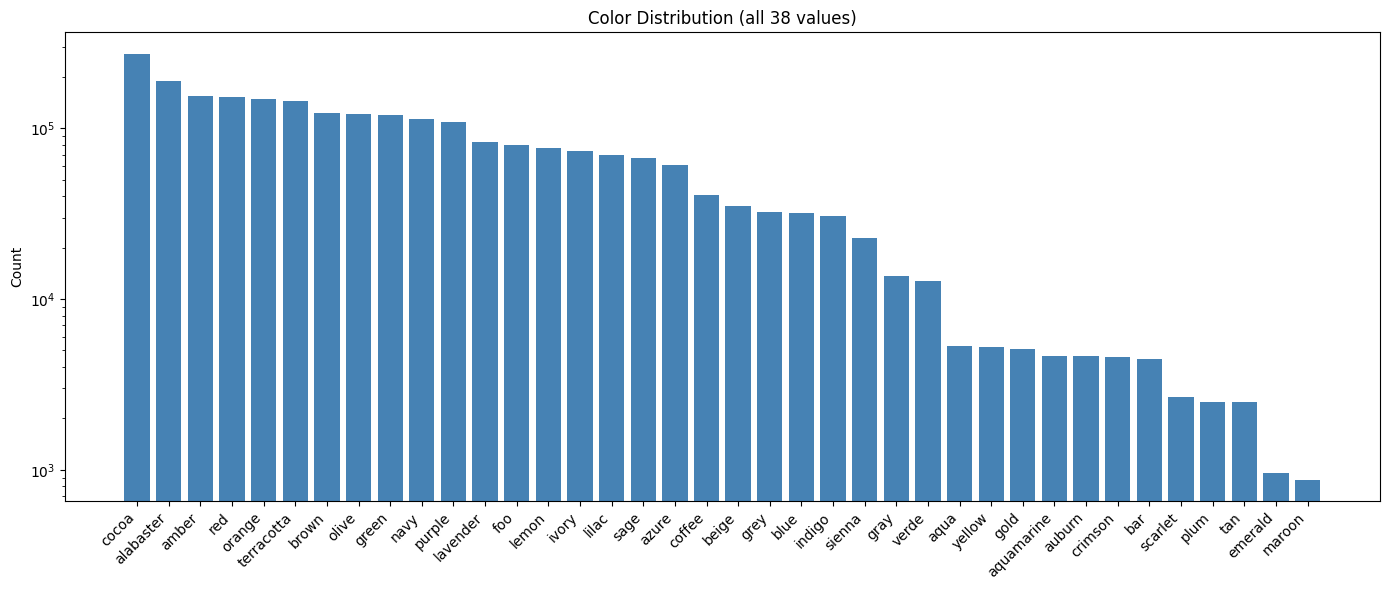

In [70]:
fig, ax = plt.subplots(figsize=(14, 6))
colors = clr_counts["clr"].to_list()
counts = clr_counts["count"].to_list()
bars = ax.bar(range(len(colors)), counts, color="steelblue")
ax.set_xticks(range(len(colors)))
ax.set_xticklabels(colors, rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("Color Distribution (all 38 values)")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

# Strange Colors

In [71]:
error_tokens = df.filter(pl.col("clr").is_in(["foo", "bar"]))
print(f"  foo: {len(df.filter(pl.col('clr') == 'foo')):,}")
print(f"  bar: {len(df.filter(pl.col('clr') == 'bar')):,}")

  foo: 79,763
  bar: 4,473


# Foo by County

In [72]:
foo_by_county = (
    df.filter(pl.col("clr") == "foo")
    .group_by("fips")
    .agg(pl.len().alias("foo_count"))
)
county_totals = df.group_by("fips").agg(pl.len().alias("total"))
foo_rates = (
    foo_by_county.join(county_totals, on="fips")
    .with_columns((pl.col("foo_count") / pl.col("total") * 100).alias("foo_pct"))
    .sort("foo_pct", descending=True)
)
foo_rates

fips,foo_count,total,foo_pct
i64,u32,u32,f64
6031,1284,10937,11.739965
6113,1435,12939,11.090502
6025,1283,11964,10.723838
6095,2972,29649,10.023947
6037,43826,445121,9.845862
…,…,…,…
6041,45,19043,0.236307
6039,28,14552,0.192413
6045,3,9405,0.031898


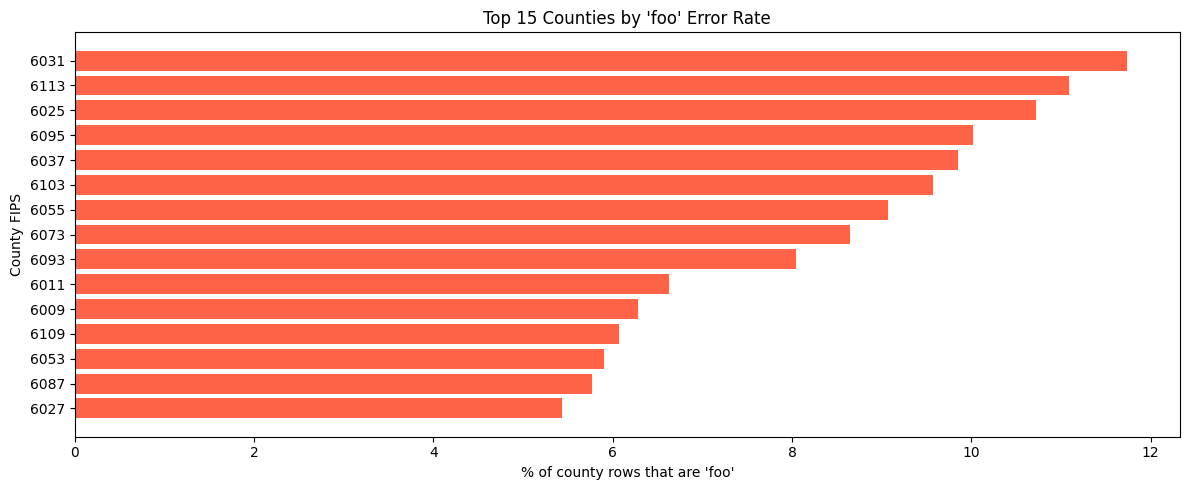

In [73]:
fig, ax = plt.subplots(figsize=(12, 5))
top_foo = foo_rates.head(15)
ax.barh(top_foo["fips"].cast(str).to_list()[::-1], top_foo["foo_pct"].to_list()[::-1], color="tomato")
ax.set_xlabel("% of county rows that are 'foo'")
ax.set_ylabel("County FIPS")
ax.set_title("Top 15 Counties by 'foo' Error Rate")
plt.tight_layout()
plt.show()

# Bar by County

In [74]:
bar_by_county = (
    df.filter(pl.col("clr") == "bar")
    .group_by("fips")
    .agg(pl.len().alias("bar_count"))
)
county_totals = df.group_by("fips").agg(pl.len().alias("total"))
bar_rates = (
    bar_by_county.join(county_totals, on="fips")
    .with_columns((pl.col("bar_count") / pl.col("total") * 100).alias("bar_pct"))
    .sort("bar_pct", descending=True)
)
bar_rates

fips,bar_count,total,bar_pct
i64,u32,u32,f64
6075,725,22197,3.266207
6047,473,20671,2.28823
6053,493,25898,1.903622
6081,594,36311,1.635868
6021,48,3198,1.500938
…,…,…,…
6017,99,24011,0.412311
6045,36,9405,0.382775
6063,8,3947,0.202686


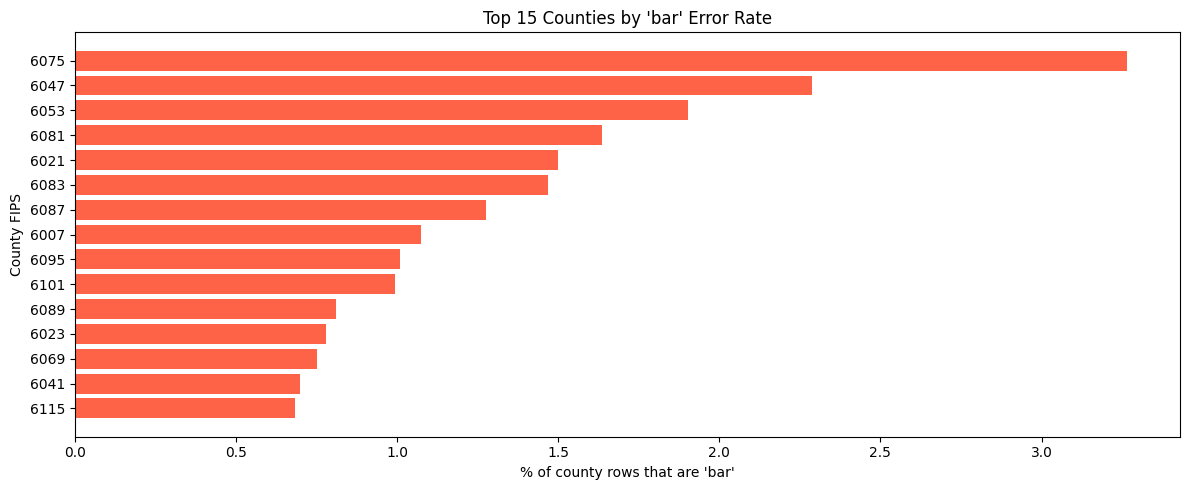

In [75]:
fig, ax = plt.subplots(figsize=(12, 5))
top_bar = bar_rates.head(15)
ax.barh(top_bar["fips"].cast(str).to_list()[::-1], top_bar["bar_pct"].to_list()[::-1], color="tomato")
ax.set_xlabel("% of county rows that are 'bar'")
ax.set_ylabel("County FIPS")
ax.set_title("Top 15 Counties by 'bar' Error Rate")
plt.tight_layout()
plt.show()

# Duplicate colors

In [76]:
duplicates = [("grey", "gray"), ("green", "verde")]
for c1, c2 in duplicates:
    n1 = len(df.filter(pl.col("clr") == c1))
    n2 = len(df.filter(pl.col("clr") == c2))
    print(f"{c1}: {n1:,} vs {c2}: {n2:,} (ratio {n1/n2:.2f}x)")

grey: 32,094 vs gray: 13,665 (ratio 2.35x)
green: 119,011 vs verde: 12,742 (ratio 9.34x)


In [77]:
grey_gray = df.filter(pl.col("clr").is_in(["grey", "gray"]))
gg_by_lc = grey_gray.group_by(["lc_type", "clr"]).agg(pl.len().alias("count"))
gg_pivot = gg_by_lc.pivot(on="clr", index="lc_type", values="count").fill_null(0)
gg_pivot

lc_type,gray,grey
str,u32,u32
"""urban+forest""",2081,2700
"""urban+shrub""",366,537
"""urban+barren""",128,656
"""barren""",149,63
"""grass""",119,222
…,…,…
"""urban+grass""",1700,1503
"""urban+other""",0,3
"""urban+crop""",3144,2145


In [78]:
lc_clr = df.group_by(["lc_type", "clr"]).agg(pl.len().alias("count"))
lc_totals = df.group_by("lc_type").agg(pl.len().alias("lc_total"))
lc_clr = lc_clr.join(lc_totals, on="lc_type")
lc_clr = lc_clr.with_columns((pl.col("count") / pl.col("lc_total") * 100).alias("pct"))
heatmap_data = lc_clr.pivot(on="clr", index="lc_type", values="pct").fill_null(0)
heatmap_data

lc_type,verde,navy,ivory,bar,sage,red,blue,purple,green,lavender,sienna,alabaster,indigo,scarlet,gold,coffee,lemon,terracotta,olive,gray,orange,aqua,grey,lilac,azure,amber,foo,brown,aquamarine,plum,cocoa,maroon,auburn,yellow,beige,crimson,tan,emerald
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""grass""",0.277094,6.999179,4.053777,0.441297,1.857553,3.735632,0.205255,1.672824,3.119869,1.734401,0.123153,20.792282,0.985222,0.0,0.0,1.590722,0.472085,3.078818,2.924877,1.221264,8.076765,0.307882,2.278325,0.45156,2.083333,3.715107,0.554187,4.638752,0.153941,0.082102,21.213054,0.0,0.0,0.0,0.964696,0.010263,0.184729,0.0
"""urban+other""",0.0,6.134969,4.294479,0.0,0.613497,7.97546,0.0,5.521472,2.453988,1.226994,1.840491,6.748466,0.0,0.0,0.0,0.0,4.294479,4.907975,6.134969,0.0,7.97546,1.226994,1.840491,4.294479,1.226994,7.97546,5.521472,1.226994,0.0,0.0,14.723926,0.613497,0.0,1.226994,0.0,0.0,0.0,0.0
"""forest""",2.926376,2.243185,1.137372,0.101498,6.584559,1.469585,1.296868,1.031609,6.044233,4.145201,0.158644,9.80306,3.1379,0.000853,0.00597,7.522773,0.049896,5.031814,11.011651,1.360411,4.175054,0.551414,2.016734,0.540326,0.982566,1.906707,0.392344,14.598188,0.465695,0.010662,8.089966,0.0,0.000426,0.0,0.614957,0.0,0.460578,0.130924
"""urban+barren""",0.0,10.361646,0.801814,0.002212,0.176952,12.60783,0.25658,9.897147,7.407653,0.212342,0.1858,10.392612,0.729927,0.008848,0.029861,0.106171,1.715328,0.869277,0.861535,0.141562,12.831232,0.13382,0.725503,0.748728,0.113913,10.848264,0.693431,0.235567,0.111701,0.038708,16.227605,0.009954,0.007742,0.056403,0.437956,0.009954,0.0,0.004424
"""urban""",0.0,5.320591,4.543598,0.082051,1.478075,6.801514,1.513227,5.567812,4.812622,1.647339,1.259688,6.095448,0.51847,0.158851,0.158851,0.350897,4.994878,5.583029,4.70147,0.067723,6.692053,0.019489,1.574009,4.331262,3.32191,6.725247,4.438676,1.256395,0.007119,0.090683,13.08705,0.050726,0.382223,0.021269,2.338899,0.00356,0.0,0.003293
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""shrub""",0.605292,6.300541,2.386478,0.167472,3.951146,4.954783,1.419924,0.965357,3.613809,2.850615,0.519164,11.269678,1.140007,0.002392,0.011962,2.756113,0.87564,4.372219,3.853055,0.972535,6.015838,0.702187,0.845734,0.986889,2.967845,3.13771,0.800278,9.742093,0.333748,0.034691,19.426767,0.017943,0.0,0.025121,1.559883,0.050242,0.35528,0.00957
"""barren""",0.0,12.111035,0.829335,0.013708,0.089102,8.108293,0.10281,2.323509,5.359836,0.109664,0.212474,10.849897,0.404387,0.0,0.013708,0.233036,0.27416,0.397533,1.665524,1.021247,14.002742,0.301576,0.431803,0.178204,0.082248,5.53804,0.781357,0.116518,1.021247,0.03427,32.467443,0.006854,0.013708,0.054832,0.829335,0.0,0.0,0.020562
"""urban+forest""",1.246346,2.500812,2.350913,0.494354,3.942339,4.092862,1.164839,2.43773,5.999076,6.737327,0.464999,7.943076,2.751268,0.077135,0.278874,2.428673,2.736278,9.233455,5.973468,0.649874,4.602518,0.241712,0.843181,2.329677,1.012129,5.909761,3.123517,8.72255,0.091813,0.22641,7.623292,0.01093,0.024046,0.088378,0.62208,0.802271,0.134597,0.087441


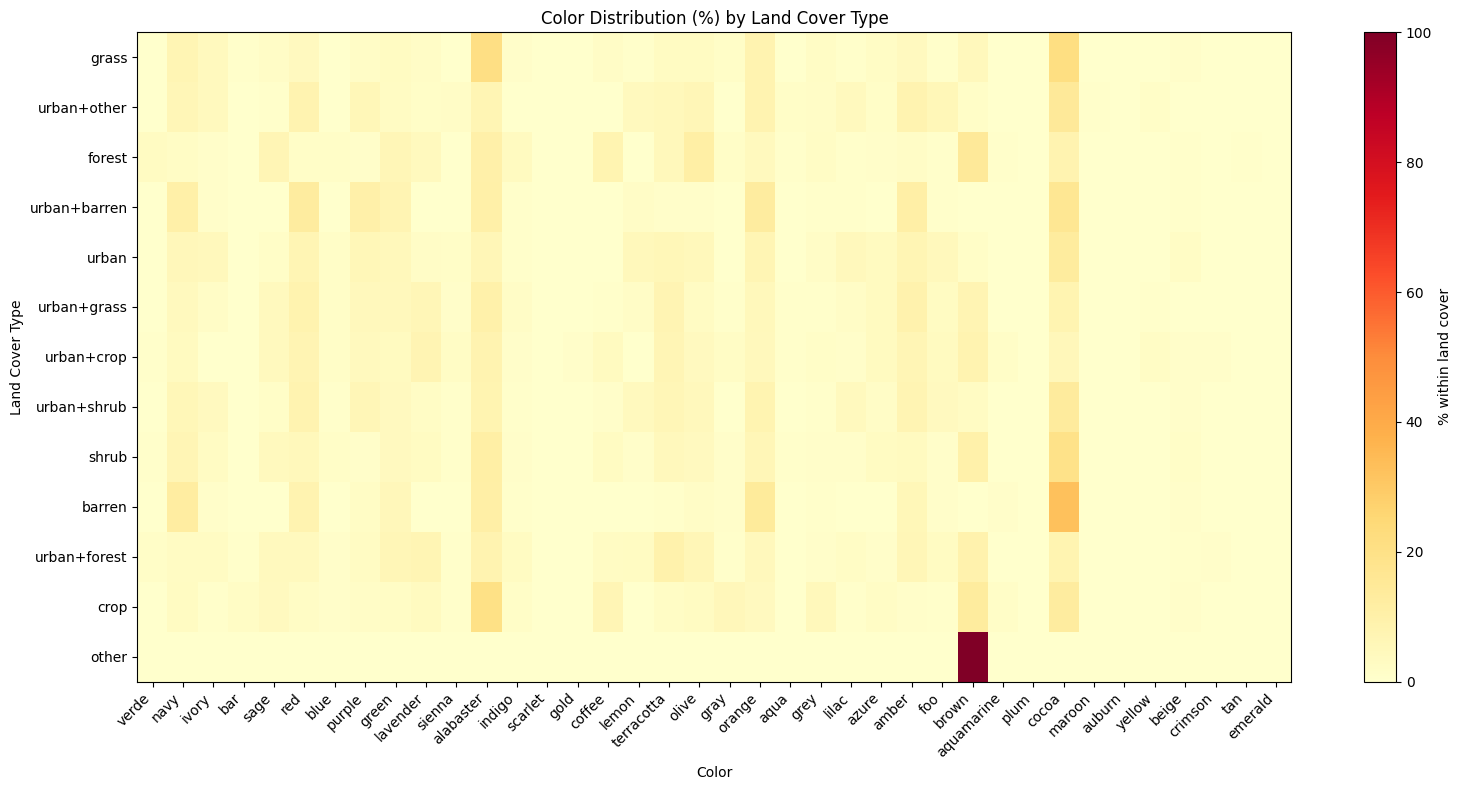

In [79]:
lc_types = heatmap_data["lc_type"].to_list()
color_cols = [c for c in heatmap_data.columns if c != "lc_type"]
matrix = heatmap_data.select(color_cols).to_numpy()

fig, ax = plt.subplots(figsize=(16, 8))
im = ax.imshow(matrix, aspect="auto", cmap="YlOrRd")
ax.set_xticks(range(len(color_cols)))
ax.set_xticklabels(color_cols, rotation=45, ha="right")
ax.set_yticks(range(len(lc_types)))
ax.set_yticklabels(lc_types)
ax.set_xlabel("Color")
ax.set_ylabel("Land Cover Type")
ax.set_title("Color Distribution (%) by Land Cover Type")
plt.colorbar(im, ax=ax, label="% within land cover")
plt.tight_layout()
plt.show()

In [80]:
county_color = df.group_by(["fips", "clr"]).agg(pl.len().alias("count"))
county_totals = df.group_by("fips").agg(pl.len().alias("county_total"))
county_color = county_color.join(county_totals, on="fips")
county_color = county_color.with_columns((pl.col("count") / pl.col("county_total") * 100).alias("pct"))
top_color_by_county = county_color.sort(["fips", "pct"], descending=[False, True]).group_by("fips").first()
top_color_by_county.sort("fips")

fips,clr,count,county_total,pct
i64,str,u32,u32,f64
6001,"""cocoa""",14601,81348,17.948813
6003,"""tan""",94,300,31.333333
6005,"""coffee""",1474,5029,29.310002
6007,"""brown""",5556,21712,25.589536
6009,"""cocoa""",2326,9237,25.181336
…,…,…,…,…
6107,"""brown""",7793,35191,22.144867
6109,"""cocoa""",2376,8915,26.651711
6111,"""brown""",9818,54531,18.004438


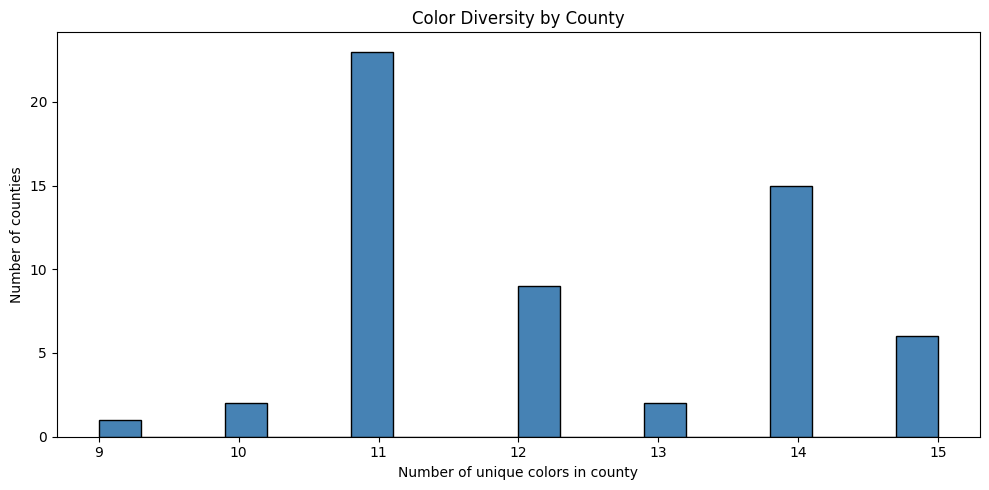

In [81]:
color_diversity = df.group_by("fips").agg(pl.col("clr").n_unique().alias("n_colors"))
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(color_diversity["n_colors"].to_list(), bins=20, color="steelblue", edgecolor="black")
ax.set_xlabel("Number of unique colors in county")
ax.set_ylabel("Number of counties")
ax.set_title("Color Diversity by County")
plt.tight_layout()
plt.show()

In [82]:
bldg_clr = df.group_by(["bldgtype", "clr"]).agg(pl.len().alias("count"))
bldg_totals = df.group_by("bldgtype").agg(pl.len().alias("bldg_total"))
bldg_clr = bldg_clr.join(bldg_totals, on="bldgtype")
bldg_clr = bldg_clr.with_columns((pl.col("count") / pl.col("bldg_total") * 100).alias("pct"))
bldg_pivot = bldg_clr.pivot(on="clr", index="bldgtype", values="pct").fill_null(0)
bldg_pivot

bldgtype,lilac,gray,foo,alabaster,blue,sienna,maroon,orange,azure,aquamarine,emerald,green,plum,terracotta,olive,beige,navy,verde,aqua,indigo,purple,sage,amber,gold,red,tan,lemon,lavender,ivory,scarlet,auburn,yellow,crimson,coffee,brown,bar,grey,cocoa
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""W""",3.095963,0.576266,3.568813,8.35531,1.432958,0.568925,0.014131,5.987572,2.739375,0.206098,0.024225,5.313212,0.058452,6.278366,5.105829,0.710698,4.927811,0.486706,0.233443,1.225759,4.690973,2.68129,6.643763,0.20151,6.411421,0.089009,3.185156,3.456588,3.176438,0.113877,0.080017,0.24317,0.204997,1.552248,4.803473,0.104976,0.899361,10.551821
"""M""",3.113272,0.570378,3.524983,8.228378,1.428006,0.662168,0.020025,6.028593,2.727718,0.198909,0.020217,5.147587,0.058063,6.241682,5.133789,0.847471,4.884866,0.463546,0.224491,1.160015,4.676088,2.761923,6.577701,0.198909,6.412422,0.075405,3.252776,3.450248,3.201804,0.113922,0.111335,0.230144,0.197855,1.508106,4.793268,0.096293,0.968197,10.689446
"""C""",1.276475,0.465529,1.329073,0.892591,0.374464,5.274686,0.318726,6.682263,0.992291,0.003925,0.260633,1.626603,0.702611,3.643372,3.056162,9.095477,0.939693,0.29282,0.00471,2.455606,2.628315,4.184265,3.8098,0.453753,4.882165,0.352483,4.19761,3.784679,1.924919,0.10598,1.643089,0.025121,0.003925,1.908433,6.433405,1.299242,6.646936,16.028167
"""S""",1.081334,0.35377,1.204819,2.105931,0.415512,3.914828,0.175216,6.417915,0.645796,0.023362,0.226947,1.6487,0.607416,4.535594,3.342456,9.616861,1.274906,0.34042,0.031706,1.515202,1.932383,3.576077,3.242332,0.230284,4.183493,0.412175,3.087141,2.998698,2.157661,0.126823,0.79765,0.015019,0.008344,2.818476,8.465441,1.083002,4.437139,20.949171
"""H""",1.578497,0.646452,1.717685,10.087534,0.600056,0.470147,0.0,7.896609,1.19908,0.309307,0.012372,4.458146,0.008248,4.183893,5.387098,1.180522,6.077884,2.085761,0.435092,1.217639,4.02924,1.83316,5.801569,0.11032,6.573806,0.041241,1.217639,2.637358,1.600148,0.023714,0.022683,0.174243,0.269097,4.063264,6.760421,0.02062,1.094947,14.174511


# Rare colors (<1% of data)

In [83]:
rare_colors = clr_counts.filter(pl.col("pct") < 1)["clr"].to_list()
rare_df = df.filter(pl.col("clr").is_in(rare_colors))
rare_by_lc = rare_df.group_by(["clr", "lc_type"]).agg(pl.len().alias("count")).sort(["clr", "count"], descending=[False, True])
rare_by_lc

clr,lc_type,count
str,str,u32
"""aqua""","""forest""",1293
"""aqua""","""urban+grass""",1056
"""aqua""","""urban+crop""",913
"""aqua""","""urban+forest""",774
"""aqua""","""shrub""",587
…,…,…
"""yellow""","""urban+shrub""",156
"""yellow""","""urban+barren""",51
"""yellow""","""shrub""",21


Strange colors:
   - 'foo' appears 79,763 times
   - 'bar' appears 4,473 times

2. Duplicate colors:
   - grey (32,094) vs gray (13,665)
   - green (119,011) vs verde (12,742)
